In [135]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sn
import matplotlib.pyplot as plt

from imblearn.over_sampling import RandomOverSampler

In [136]:
df = pd.read_csv('test_sample_csv')

In [137]:
df.shape

(2703, 70)

Class 0: 2165
Class 1: 538
Proportion: 4.02 : 1


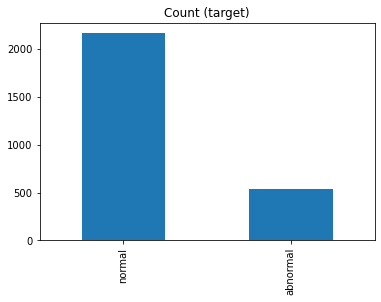

In [138]:
target_count = df.target.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

In [139]:
df_test = df.iloc[:,5:30]
df_test["target"].replace({"abnormal": "1", "normal": "0"}, inplace=True)
df_test = df_test.astype({"target": int})

In [140]:
df.head()

,noise_db,machine_type,model_id,sound,sound_path,target,spect_mean,spect_min,spect_max,spect_std,...,zero_crossing_rate_max,zero_crossing_rate_std,d_harmonic_mean,d_harmonic_min,d_harmonic_max,d_harmonic_std,d_percussive_mean,d_percussive_min,d_percussive_max,d_percussive_std
0,-6,slider,6,00000325.wav,assets/sounds/-6_dB_slider/id_06/normal/000003...,normal,0.086186,1.850374e-10,8.282417,0.239661,...,0.183105,0.019458,0.051047,3.093022e-13,8.259317,0.196500,0.035139,8.307444e-11,3.125634,0.079335
1,0,pump,0,00000814.wav,assets/sounds/0_dB_pump/id_00/normal/00000814.wav,normal,0.064292,9.486077e-11,4.943036,0.152599,...,0.103516,0.011921,0.033057,1.974081e-13,2.383167,0.098131,0.031234,3.159423e-11,2.559869,0.068802
2,6,valve,0,00000928.wav,assets/sounds/6_dB_valve/id_00/normal/00000928...,normal,0.028409,6.772467e-11,1.246882,0.074859,...,0.242188,0.035117,0.012415,7.563213e-14,0.953090,0.039711,0.015994,4.018324e-11,1.243116,0.048474
3,-6,pump,6,00000043.wav,assets/sounds/-6_dB_pump/id_06/normal/00000043...,normal,0.099990,1.298539e-10,4.971423,0.284035,...,0.073730,0.005807,0.055119,5.787144e-14,4.255203,0.183855,0.044872,4.671323e-11,2.199901,0.119220
4,-6,pump,2,00000420.wav,assets/sounds/-6_dB_pump/id_02/normal/00000420...,normal,0.094911,6.309869e-11,4.607907,0.261325,...,0.075684,0.006278,0.052051,9.006482e-14,4.094114,0.171043,0.042860,4.865160e-11,2.621902,0.111749


In [141]:
y = df_test['target']
df_test = df_test.drop('target', 1)

In [142]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='auto')

In [143]:
df_test.head()

,spect_mean,spect_min,spect_max,spect_std,mel_spect_mean,mel_spect_min,mel_spect_max,mel_spect_std,chroma_mean,chroma_min,...,chroma_cq_max,chroma_cq_std,chroma_cens_mean,chroma_cens_min,chroma_cens_max,chroma_cens_std,mfcc_mean,mfcc_min,mfcc_max,mfcc_std
0,0.086186,1.850374e-10,8.282417,0.239661,0.019379,8.581393e-17,2.786268,0.078743,0.505052,0.148336,...,1.0,0.197034,0.276374,0.061001,0.482504,0.083370,-6.072476,-394.403290,174.488388,65.784767
1,0.064292,9.486077e-11,4.943036,0.152599,0.008011,4.531395e-17,1.582137,0.023850,0.788932,0.291779,...,1.0,0.193601,0.273447,0.026607,0.523059,0.092521,-5.583241,-424.262604,183.783417,69.504570
2,0.028409,6.772467e-11,1.246882,0.074859,0.001583,7.011302e-18,0.075360,0.004580,0.783146,0.398304,...,1.0,0.178200,0.277555,0.075984,0.500553,0.079351,-7.468907,-524.362366,202.562393,86.180298
3,0.099990,1.298539e-10,4.971423,0.284035,0.027485,1.376388e-16,1.310772,0.076738,0.785040,0.415580,...,1.0,0.179581,0.276391,0.135030,0.492550,0.083314,-4.352341,-380.365692,204.089294,68.040657
4,0.094911,6.309869e-11,4.607907,0.261325,0.022943,1.127883e-16,1.023681,0.067418,0.792248,0.443029,...,1.0,0.194761,0.273493,0.078243,0.479493,0.092385,-4.366798,-386.558868,208.120911,68.488121


In [144]:
df_test.shape

(2703, 24)

In [145]:
# fit and apply the transform
X_over, y_over = oversample.fit_resample(df_test, y)

Class 0: 2165
Class 1: 2165
Proportion: 1.0 : 1


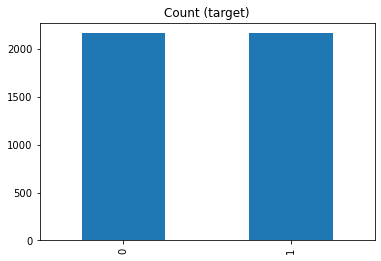

In [146]:
target_count = y_over.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

In [159]:
# Split dataframe into random train and test subsets

X_train, X_test, Y_train, Y_test = train_test_split(
    X_over,
    y_over,
    test_size=0.2,
    random_state=100
)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(3464, 24) (3464,)
(866, 24) (866,)


In [160]:
Y_train.values.sum()

1718

In [161]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state = 5, n_estimators = 100,
                                    criterion = 'gini')

In [162]:
from sklearn.model_selection import cross_val_score
# 10-Fold Cross validation
print(np.mean(cross_val_score(random_forest, X_train, Y_train, cv=10)))

0.9662216188302709


In [163]:
random_forest.fit(X_train, Y_train)

RandomForestClassifier(random_state=5)

In [164]:
acc_random_forest = round(random_forest.score(X_test, Y_test) * 100, 2)
acc_random_forest

97.81

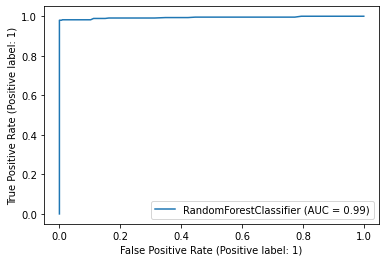

In [165]:
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score

roc = plot_roc_curve(random_forest, X_test, Y_test)

In [166]:
y_pred = random_forest.predict(X_test)

In [167]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,classification_report, confusion_matrix

In [168]:
print(f1_score(Y_test, y_pred, average="macro"))
print(precision_score(Y_test, y_pred, average="macro"))
print(recall_score(Y_test, y_pred, average="macro")) 

0.9780318960740726
0.9781623931623931
0.9779249624919244


In [169]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       419
           1       0.98      0.98      0.98       447

    accuracy                           0.98       866
   macro avg       0.98      0.98      0.98       866
weighted avg       0.98      0.98      0.98       866



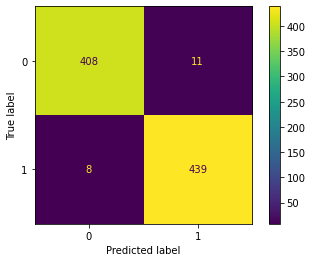

In [170]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(random_forest, X_test, Y_test);